# ROMS (Regional Ocean Modeling System)
### Efficiently tracking particles in a ROMS simulation

Task 1: Reach out and open files that are on the internet

In [19]:
# imports
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import xarray as xr

# plot inline
%matplotlib inline

In [3]:
# open dataset
ds = xr.open_dataset('https://oceanmodeling.ucsc.edu:8443/thredds/dodsC/ccsra_2016a_phys_agg_zlevs/fmrc/CCSRA_2016a_Phys_ROMS_z-level_(depth)_Aggregation_best.ncd')
ds

<xarray.Dataset>
Dimensions:      (eta_rho: 181, xi_rho: 186, eta_u: 181, xi_u: 185, eta_v: 180, xi_v: 186, ocean_time: 1, z: 11, time: 4208)
Coordinates:
    lat_rho      (eta_rho, xi_rho) float64 ...
    lat_u        (eta_u, xi_u) float64 ...
    lat_v        (eta_v, xi_v) float64 ...
    lon_rho      (eta_rho, xi_rho) float64 ...
    lon_u        (eta_u, xi_u) float64 ...
    lon_v        (eta_v, xi_v) float64 ...
  * ocean_time   (ocean_time) datetime64[ns] 2022-07-09
  * z            (z) float64 -250.0 -200.0 -150.0 -100.0 ... -10.0 -5.0 -2.0
  * time         (time) datetime64[ns] 2011-01-02 2011-01-03 ... 2022-07-10
    time_run     (time) datetime64[ns] ...
Dimensions without coordinates: eta_rho, xi_rho, eta_u, xi_u, eta_v, xi_v
Data variables: (12/15)
    angle        (eta_rho, xi_rho) float64 ...
    h            (eta_rho, xi_rho) float64 ...
    mask_rho     (eta_rho, xi_rho) float64 ...
    mask_u       (eta_u, xi_u) float64 ...
    mask_v       (eta_v, xi_v) float64 ...
    ubar         (time, eta_u, xi_u) float64 ...
    ...           ...
    salt         (time, z, eta_rho, xi_rho) float32 ...
    rho          (time, z, eta_rho, xi_rho) float32 ...
    u            (time, z, eta_u, xi_u) float32 ...
    v            (time, z, eta_v, xi_v) float32 ...
    w            (time, z, eta_rho, xi_rho) float32 ...
    time_offset  (time) datetime64[ns] ...
Attributes: (12/46)
    file:                            output/da_fwd_002.nc
    format:                          netCDF-3 64bit offset file
    Conventions:                     CF-1.4
    type:                            ROMS/TOMS history file
    title:                           UCSC California Current System, wc12.0_c...
    state_vector:                    zeta, ubar, vbar, u, v, temp, salt
    ...                              ...
    NCO:                             "4.5.2"
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    cdm_data_type:                   GRID
    featureType:                     GRID
    location:                        Proto fmrc:CCSRA_2016a_Phys_ROMS_z-level...
    DODS_EXTRA.Unlimited_Dimension:  ocean_time

Task 2: Determine within which grid cell a point/particle falls

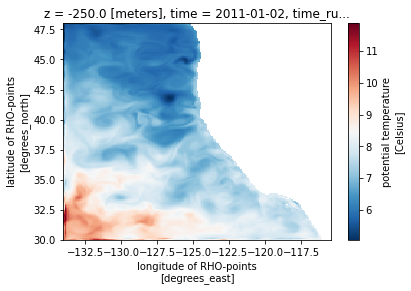

In [26]:
ds.temp.isel(z=0, time=0).plot(x="lon_rho", y="lat_rho", cmap="RdBu_r")